<h1>
<hr style=" border:none; height:3px;">
<center>SLICK - Post processing</center>
<hr style=" border:none; height:3px;">
</h1>

<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h4><center>Louis LHOTTE | Clément VERON | Edouard SEGUIER</center></h4>

In [1]:
from PIL import Image
import numpy as np
import cv2
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt

# I - Clustering

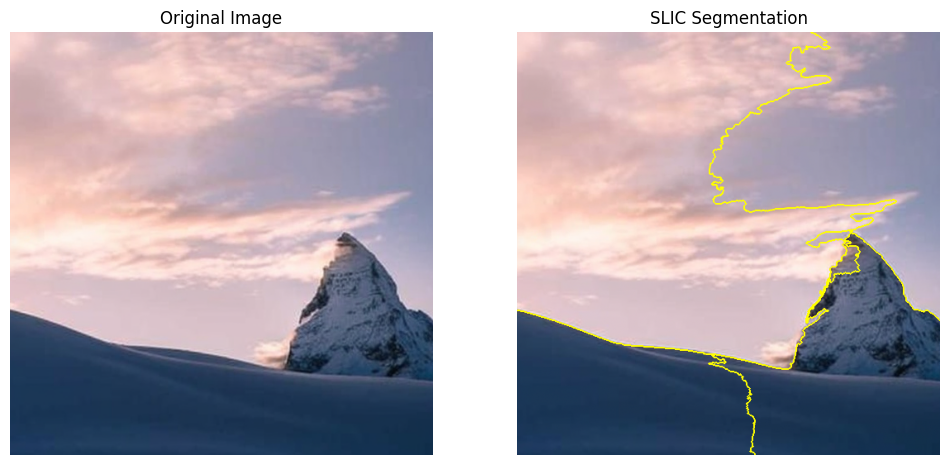

In [2]:
def segment_image_with_slic(image_path, n_segments=4, compactness=20):
    """
    Reads an image, applies SLIC segmentation, and clusters different squares.
    
    Parameters:
    - image_path (str): Path to the input image.
    - n_segments (int): The approximate number of superpixels (default is 4).
    - compactness (float): Balances color proximity and space proximity (default is 20).
    
    Returns:
    - None (displays the original image and the segmented image).
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    
    # Convert the image from BGR (OpenCV default) to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert the image to float format required by SLIC
    image_float = img_as_float(image_rgb)
    segments = slic(image_float, n_segments=n_segments, compactness=compactness, start_label=1)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Original image
    ax[0].imshow(image_rgb)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    # Image with SLIC segmentation
    ax[1].imshow(mark_boundaries(image_rgb, segments))
    ax[1].set_title("SLIC Segmentation")
    ax[1].axis("off")
    
    plt.show()

# Example usage:
segment_image_with_slic("base.png", n_segments=3, compactness=20)

# II - Modification

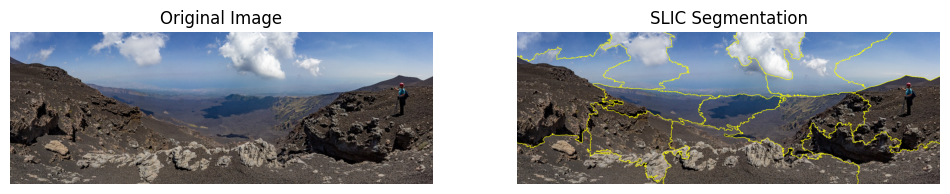

In [3]:
segment_image_with_slic("sicilia.jpg", n_segments=20, compactness=15)

# III - Post processing